Датасет: Flight Price Prediction

Целевая переменная: Price (цена билета)


In [1]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
import warnings
warnings.filterwarnings('ignore')

# Установим стиль графиков
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("Библиотеки успешно импортированы.")

Библиотеки успешно импортированы.


In [2]:
# Загрузка датасета
file_path = "Clean_Dataset.csv"  # Убедитесь, что файл в той же директории
df = pd.read_csv(file_path)

# Выведем основную информацию о датасете
print("Размер датасета:", df.shape)
print("\nПервые 5 строк:")
print(df.head())
print("\nИнформация о данных:")
print(df.info())
print("\nОписательная статистика:")
print(df.describe())

Размер датасета: (300153, 12)

Первые 5 строк:
   Unnamed: 0   airline   flight source_city departure_time stops  \
0           0  SpiceJet  SG-8709       Delhi        Evening  zero   
1           1  SpiceJet  SG-8157       Delhi  Early_Morning  zero   
2           2   AirAsia   I5-764       Delhi  Early_Morning  zero   
3           3   Vistara   UK-995       Delhi        Morning  zero   
4           4   Vistara   UK-963       Delhi        Morning  zero   

    arrival_time destination_city    class  duration  days_left  price  
0          Night           Mumbai  Economy      2.17          1   5953  
1        Morning           Mumbai  Economy      2.33          1   5953  
2  Early_Morning           Mumbai  Economy      2.17          1   5956  
3      Afternoon           Mumbai  Economy      2.25          1   5955  
4        Morning           Mumbai  Economy      2.33          1   5955  

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152


In [4]:
# Проведем предварительный анализ данных (EDA)

# 1. Проверим на наличие пропущенных значений
print("Пропущенные значения:")
print(df.isnull().sum())

# 2. Выведем названия столбцов, чтобы увидеть их точные имена
print("\nНазвания столбцов в датасете:")
print(df.columns.tolist())

# 3. Теперь определим категориальные признаки с правильными именами
categorical_cols = ['airline', 'source_city', 'departure_time', 'stops',
                    'arrival_time', 'destination_city', 'class']
print("\nУникальные значения в категориальных признаках:")
for col in categorical_cols:
    print(f"{col}: {df[col].unique()}")
    print(f"Количество уникальных значений: {df[col].nunique()}")
    print("-" * 40)

# 4. Проверим дубликаты
print(f"\nКоличество полных дубликатов: {df.duplicated().sum()}")

# 5. Посмотрим на типы данных
print("\nТипы данных:")
print(df.dtypes)

Пропущенные значения:
Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Названия столбцов в датасете:
['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']

Уникальные значения в категориальных признаках:
airline: ['SpiceJet' 'AirAsia' 'Vistara' 'GO_FIRST' 'Indigo' 'Air_India']
Количество уникальных значений: 6
----------------------------------------
source_city: ['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']
Количество уникальных значений: 6
----------------------------------------
departure_time: ['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']
Количество уникальных значений: 6
----------------------------------------
st

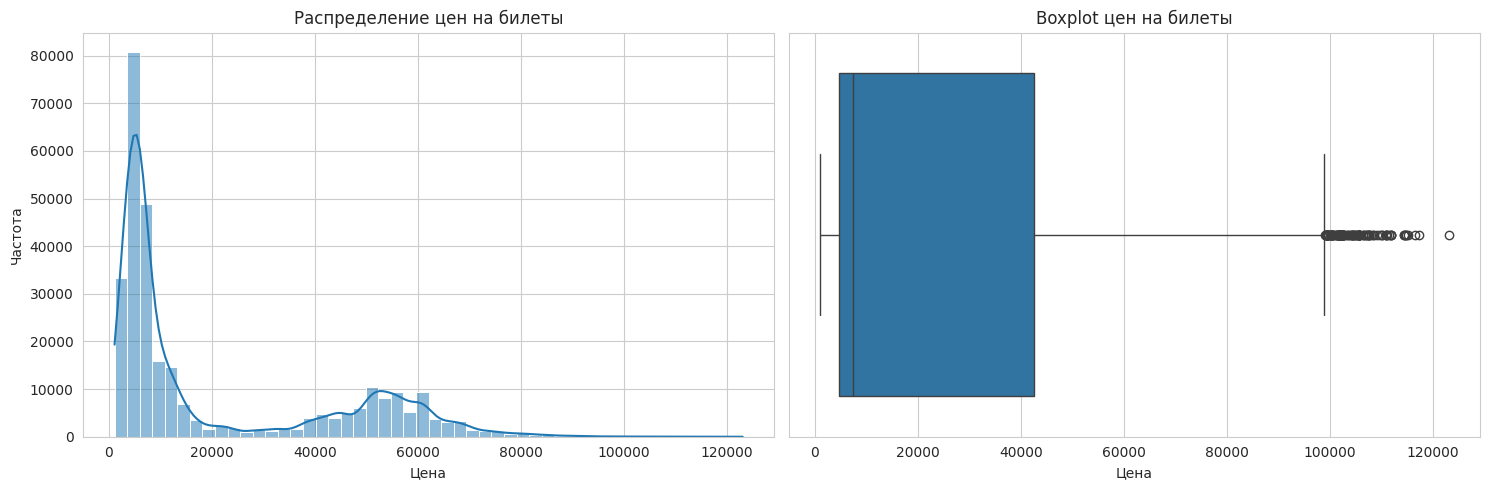

Статистики целевой переменной price:
Минимум: 1105
Максимум: 123071
Среднее: 20889.66
Медиана: 7425.0
Стандартное отклонение: 22697.77


In [5]:

# Визуализация распределения целевой переменной
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Распределение цен на билеты')
plt.xlabel('Цена')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['price'])
plt.title('Boxplot цен на билеты')
plt.xlabel('Цена')

plt.tight_layout()
plt.show()

# Посмотрим на статистики целевой переменной
print("Статистики целевой переменной price:")
print(f"Минимум: {df['price'].min()}")
print(f"Максимум: {df['price'].max()}")
print(f"Среднее: {df['price'].mean():.2f}")
print(f"Медиана: {df['price'].median()}")
print(f"Стандартное отклонение: {df['price'].std():.2f}")

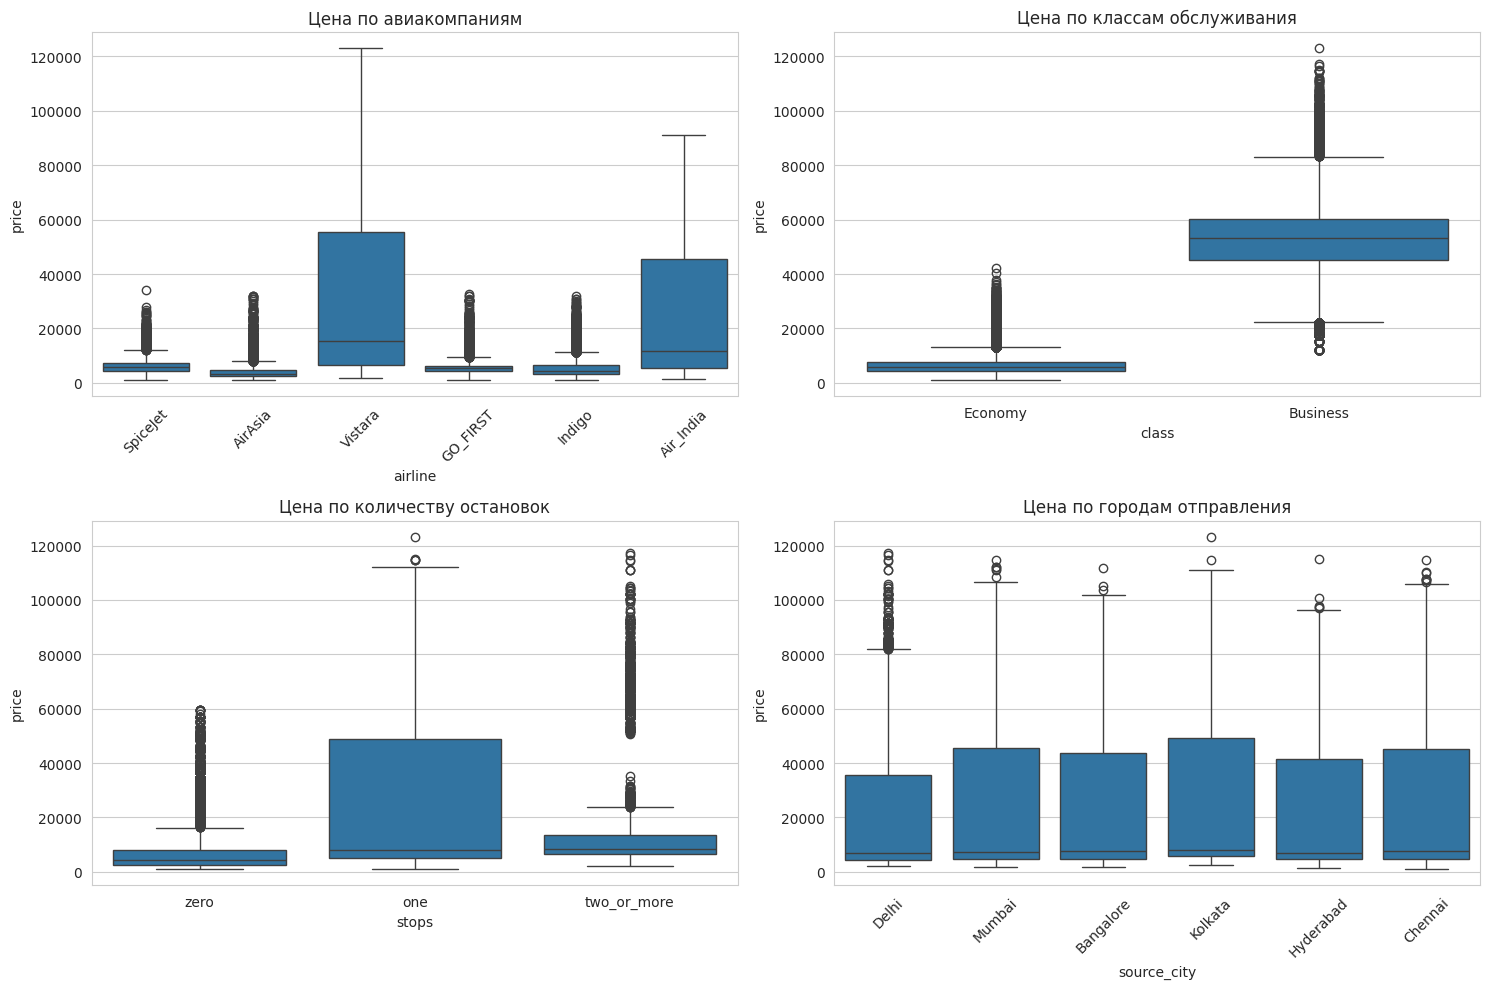

In [6]:
# Визуализация важных категориальных признаков с правильными именами
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Влияние авиакомпании на цену
sns.boxplot(data=df, x='airline', y='price', ax=axes[0, 0])
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_title('Цена по авиакомпаниям')

# Влияние класса на цену
sns.boxplot(data=df, x='class', y='price', ax=axes[0, 1])
axes[0, 1].set_title('Цена по классам обслуживания')

# Влияние количества остановок на цену
sns.boxplot(data=df, x='stops', y='price', ax=axes[1, 0])
axes[1, 0].set_title('Цена по количеству остановок')

# Влияние города отправления на цену
sns.boxplot(data=df, x='source_city', y='price', ax=axes[1, 1])
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].set_title('Цена по городам отправления')

plt.tight_layout()
plt.show()

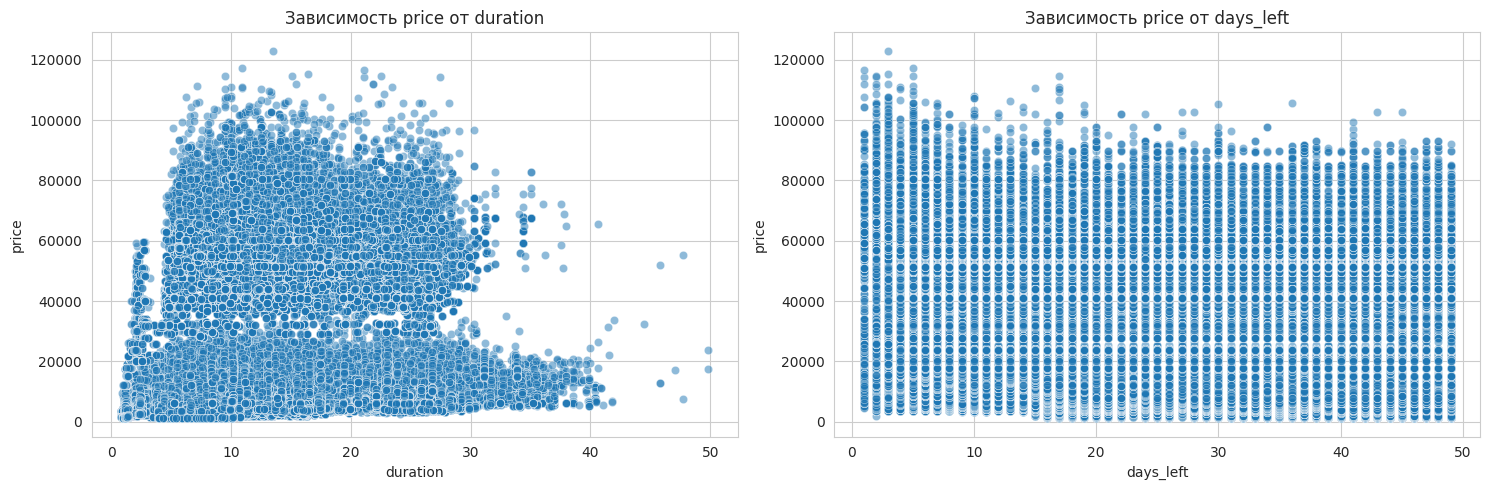

Матрица корреляций:
           duration  days_left     price
duration   1.000000  -0.039157  0.204222
days_left -0.039157   1.000000 -0.091949
price      0.204222  -0.091949  1.000000


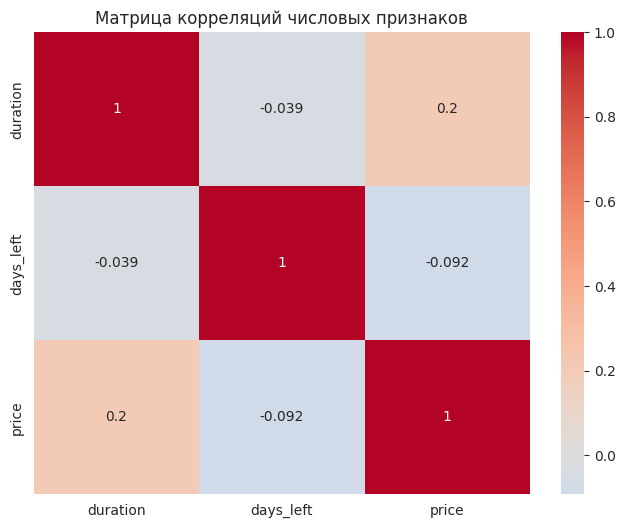

In [7]:
# Анализ числовых признаков
numerical_cols = ['duration', 'days_left']

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

for idx, col in enumerate(numerical_cols):
    sns.scatterplot(data=df, x=col, y='price', ax=axes[idx], alpha=0.5)
    axes[idx].set_title(f'Зависимость price от {col}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('price')

plt.tight_layout()
plt.show()

# Корреляция числовых признаков
corr_matrix = df[['duration', 'days_left', 'price']].corr()
print("Матрица корреляций:")
print(corr_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляций числовых признаков')
plt.show()

In [8]:
# Подготовка данных для моделирования

# Удалим ненужные столбцы
# flight - уникальный код рейса, не несет полезной информации для прогнозирования
# Unnamed: 0 - вероятно, индексный столбец
df_clean = df.drop(columns=['flight', 'Unnamed: 0'], errors='ignore')
print(f"Размер датасета после удаления ненужных столбцов: {df_clean.shape}")

# Проверим, есть ли другие неинформативные столбцы
print("\nСтолбцы в датасете:")
print(df_clean.columns.tolist())

Размер датасета после удаления ненужных столбцов: (300153, 10)

Столбцы в датасете:
['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class', 'duration', 'days_left', 'price']


In [9]:
# Разделение на признаки и целевую переменную
X = df_clean.drop(columns=['price'])
y = df_clean['price']

print(f"Признаки (X): {X.shape}")
print(f"Целевая переменная (y): {y.shape}")

# Разделение категориальных и числовых признаков
categorical_features = ['airline', 'source_city', 'departure_time', 'stops',
                        'arrival_time', 'destination_city', 'class']
numerical_features = ['duration', 'days_left']

print(f"\nКатегориальные признаки ({len(categorical_features)}):")
print(categorical_features)
print(f"\nЧисловые признаки ({len(numerical_features)}):")
print(numerical_features)

Признаки (X): (300153, 9)
Целевая переменная (y): (300153,)

Категориальные признаки (7):
['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

Числовые признаки (2):
['duration', 'days_left']


In [10]:
# Преобразование категориальных признаков с помощью One-Hot Encoding
# Используем ColumnTransformer для удобства

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features)
    ])

# Применяем преобразования
X_processed = preprocessor.fit_transform(X)

# Посмотрим на размерность после преобразования
print(f"Размерность признаков после кодирования: {X_processed.shape}")

# Получим имена фичей после one-hot encoding
# Это важно для интерпретации важности признаков позже
cat_encoder = preprocessor.named_transformers_['cat']
cat_feature_names = cat_encoder.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, cat_feature_names])

print(f"\nКоличество признаков после кодирования: {len(all_feature_names)}")
print("\nПримеры имен признаков:")
for i, name in enumerate(all_feature_names[:10]):
    print(f"{i}: {name}")

Размерность признаков после кодирования: (300153, 30)

Количество признаков после кодирования: 30

Примеры имен признаков:
0: duration
1: days_left
2: airline_Air_India
3: airline_GO_FIRST
4: airline_Indigo
5: airline_SpiceJet
6: airline_Vistara
7: source_city_Chennai
8: source_city_Delhi
9: source_city_Hyderabad


In [11]:
# Разделение на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y, test_size=0.2, random_state=42
)

print(f"Тренировочная выборка: {X_train.shape}")
print(f"Тестовая выборка: {X_test.shape}")
print(f"Тренировочные метки: {y_train.shape}")
print(f"Тестовые метки: {y_test.shape}")

Тренировочная выборка: (240122, 30)
Тестовая выборка: (60031, 30)
Тренировочные метки: (240122,)
Тестовые метки: (60031,)


 Продолжим с бейзлайн моделью:


In [13]:
# Оптимизированная бейзлайн модель: Random Forest с параметрами для скорости

# Инициализация модели с оптимизированными параметрами
baseline_rf = RandomForestRegressor(
    n_estimators=50,          # Уменьшили количество деревьев (можно увеличить позже)
    max_depth=15,             # Ограничиваем глубину для ускорения
    min_samples_split=10,     # Минимальное количество samples для split
    min_samples_leaf=5,       # Минимальное количество samples в листе
    max_features='sqrt',      # Количество фичей для рассмотрения при split
    random_state=42,
    n_jobs=-1,                # Используем все ядра
    verbose=1                 # Выводим прогресс обучения
)

# Обучение модели
print("Обучение оптимизированной бейзлайн модели Random Forest...")
baseline_rf.fit(X_train, y_train)

# Предсказания
y_train_pred = baseline_rf.predict(X_train)
y_test_pred = baseline_rf.predict(X_test)

# Функция для оценки модели
def evaluate_model(y_true, y_pred, dataset_name=""):
    """Вычисляет метрики регрессии и выводит их"""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"{dataset_name}:")
    print(f"  MAE:  {mae:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²:   {r2:.4f}")
    print()

    return {'MAE': mae, 'RMSE': rmse, 'R²': r2}

# Оценка модели
print("Оценка оптимизированной бейзлайн модели:")
baseline_train_metrics = evaluate_model(y_train, y_train_pred, "Тренировочная выборка")
baseline_test_metrics = evaluate_model(y_test, y_test_pred, "Тестовая выборка")

Обучение оптимизированной бейзлайн модели Random Forest...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   13.7s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.1s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    2.2s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


Оценка оптимизированной бейзлайн модели:
Тренировочная выборка:
  MAE:  2523.03
  RMSE: 4092.12
  R²:   0.9675

Тестовая выборка:
  MAE:  2602.24
  RMSE: 4258.97
  R²:   0.9648



[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.9s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    1.0s finished


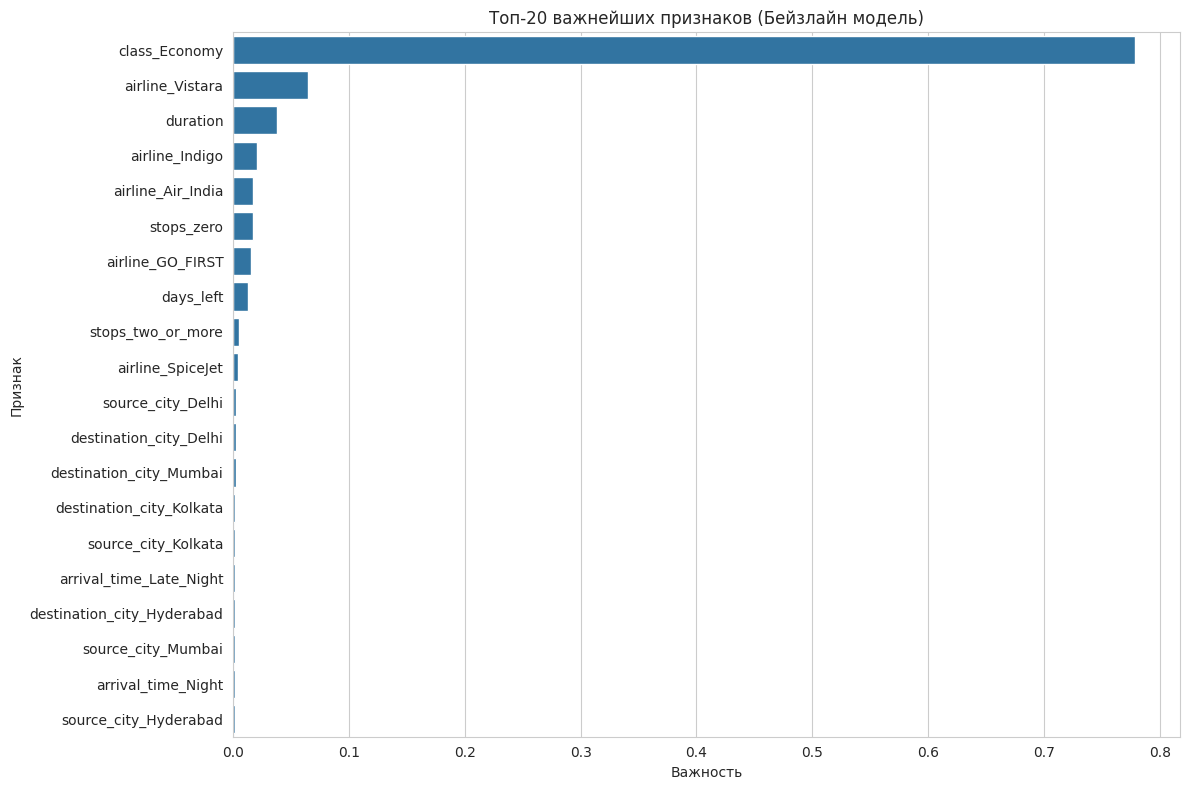

Топ-10 важнейших признаков:
          Feature  Importance
    class_Economy    0.778483
  airline_Vistara    0.064840
         duration    0.038215
   airline_Indigo    0.020395
airline_Air_India    0.017523
       stops_zero    0.016915
 airline_GO_FIRST    0.015081
        days_left    0.012811
stops_two_or_more    0.004651
 airline_SpiceJet    0.003771


In [14]:
# Визуализация важности признаков в бейзлайн модели

# Получаем важность признаков
feature_importance = baseline_rf.feature_importances_

# Создаем DataFrame для удобства
importance_df = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

# Визуализируем топ-20 признаков
plt.figure(figsize=(12, 8))
top_features = importance_df.head(20)
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.title('Топ-20 важнейших признаков (Бейзлайн модель)')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

# Выведем топ-10 признаков
print("Топ-10 важнейших признаков:")
print(importance_df.head(10).to_string(index=False))

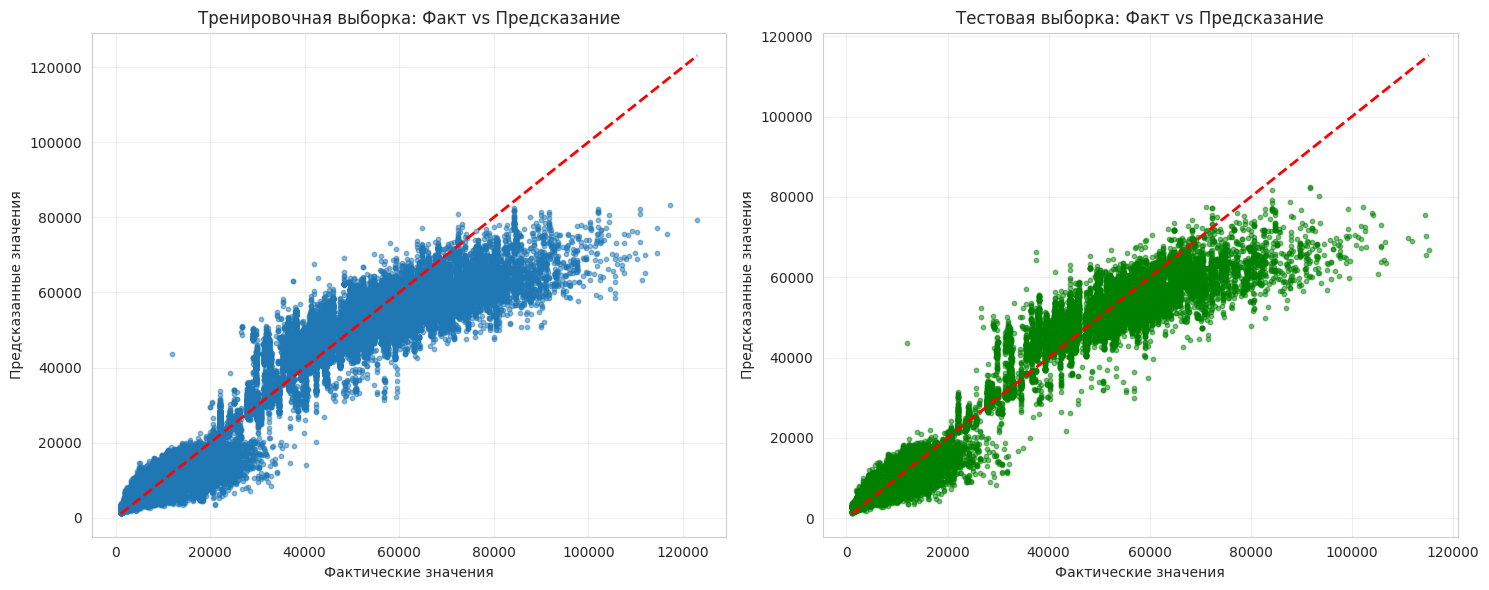

In [15]:
# Визуализация предсказаний vs фактические значения
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Для тренировочной выборки
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=10)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
             'r--', lw=2)
axes[0].set_xlabel('Фактические значения')
axes[0].set_ylabel('Предсказанные значения')
axes[0].set_title('Тренировочная выборка: Факт vs Предсказание')
axes[0].grid(True, alpha=0.3)

# Для тестовой выборки
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=10, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2)
axes[1].set_xlabel('Фактические значения')
axes[1].set_ylabel('Предсказанные значения')
axes[1].set_title('Тестовая выборка: Факт vs Предсказание')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

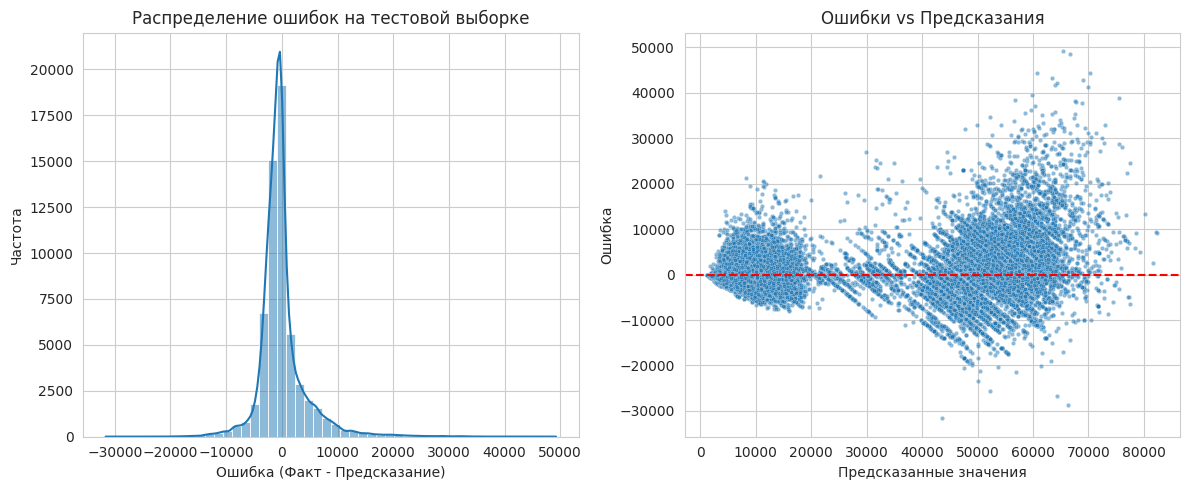

Статистики ошибок на тестовой выборке:
Средняя ошибка: -11.54
Стандартное отклонение ошибок: 4258.99
Медианная ошибка: -564.11


In [16]:
# Гистограмма ошибок
errors_test = y_test - y_test_pred

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(errors_test, kde=True, bins=50)
plt.title('Распределение ошибок на тестовой выборке')
plt.xlabel('Ошибка (Факт - Предсказание)')
plt.ylabel('Частота')

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test_pred, y=errors_test, alpha=0.5, s=10)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Ошибки vs Предсказания')
plt.xlabel('Предсказанные значения')
plt.ylabel('Ошибка')

plt.tight_layout()
plt.show()

# Статистики ошибок
print("Статистики ошибок на тестовой выборке:")
print(f"Средняя ошибка: {errors_test.mean():.2f}")
print(f"Стандартное отклонение ошибок: {errors_test.std():.2f}")
print(f"Медианная ошибка: {errors_test.median():.2f}")

 Результаты бейзлайн модели:
R² на тесте: 0.9648

MAE: 2602.24

RMSE: 4258.97

 Анализ результатов:
Положительные моменты:
Высокий R² (0.9648) - модель объясняет 96.48% дисперсии цены

Нет переобучения - разница между train и test небольшая

Важность признаков соответствует ожиданиям:

Класс билета (Economy) - самый важный признак (77.8%)

Авиакомпания Vistara - вторая по важности

Длительность перелета - третья по важности



Улучшение бейзлайна

In [19]:

try:
    from sklearn.experimental import enable_halving_search_cv
    from sklearn.model_selection import HalvingRandomSearchCV

    print("\nГипотеза 1: Сверхбыстрый подбор гиперпараметров с HalvingRandomSearchCV...")

    # Простая сетка
    param_dist_simple = {
        'n_estimators': [50, 100],
        'max_depth': [10, 15, None],
        'max_features': ['sqrt', 0.5],
    }

    # HalvingRandomSearchCV - быстрее за счет последовательного отбора
    halving_search = HalvingRandomSearchCV(
        estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
        param_distributions=param_dist_simple,
        factor=3,  # Каждый этап в 3 раза меньше кандидатов
        cv=2,
        scoring='r2',
        n_jobs=-1,
        random_state=42,
        verbose=0
    )

    # Используем маленькую выборку
    sample_size_small = min(10000, len(X_train))
    print(f"Используем {sample_size_small} samples для сверхбыстрого поиска...")

    start_time = time.time()
    halving_search.fit(X_train[:sample_size_small], y_train[:sample_size_small])
    end_time = time.time()

    print(f"Сверхбыстрый поиск завершен за {end_time - start_time:.2f} секунд")
    print(f"Лучшие параметры: {halving_search.best_params_}")
    print(f"Лучший R²: {halving_search.best_score_:.4f}")

    # Используем найденные параметры
    improved_rf = RandomForestRegressor(**halving_search.best_params_, random_state=42, n_jobs=-1)

except ImportError:
    print("HalvingRandomSearchCV не доступен, используем обычный RandomizedSearchCV")
    # Используем первый вариант


Гипотеза 1: Сверхбыстрый подбор гиперпараметров с HalvingRandomSearchCV...
Используем 10000 samples для сверхбыстрого поиска...
Сверхбыстрый поиск завершен за 12.92 секунд
Лучшие параметры: {'n_estimators': 100, 'max_features': 0.5, 'max_depth': 15}
Лучший R²: 0.7667


In [20]:
# Гипотеза 2: Обработка выбросов в целевой переменной
print("\n" + "=" * 60)
print("Гипотеза 2: Обработка выбросов в целевой переменной")
print("=" * 60)

# Анализируем выбросы в цене
Q1 = y_train.quantile(0.25)
Q3 = y_train.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25-й перцентиль): {Q1}")
print(f"Q3 (75-й перцентиль): {Q3}")
print(f"IQR: {IQR}")
print(f"Нижняя граница: {lower_bound}")
print(f"Верхняя граница: {upper_bound}")

# Считаем выбросы
outliers_low = (y_train < lower_bound).sum()
outliers_high = (y_train > upper_bound).sum()
total_outliers = outliers_low + outliers_high

print(f"\nВыбросы ниже нижней границы: {outliers_low}")
print(f"Выбросы выше верхней границы: {outliers_high}")
print(f"Всего выбросов: {total_outliers} ({total_outliers/len(y_train)*100:.2f}%)")

# Обучаем модель без выбросов
print("\nОбучение модели на данных без выбросов...")
mask_no_outliers = (y_train >= lower_bound) & (y_train <= upper_bound)
X_train_no_outliers = X_train[mask_no_outliers]
y_train_no_outliers = y_train[mask_no_outliers]

print(f"Размер тренировочных данных без выбросов: {X_train_no_outliers.shape}")

# Создаем и обучаем модель
rf_no_outliers = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)

rf_no_outliers.fit(X_train_no_outliers, y_train_no_outliers)

# Предсказания
y_train_pred_no_outliers = rf_no_outliers.predict(X_train)
y_test_pred_no_outliers = rf_no_outliers.predict(X_test)

# Оценка
print("\nОценка модели, обученной без выбросов:")
no_outliers_train_metrics = evaluate_model(y_train, y_train_pred_no_outliers, "Тренировочная выборка (без выбросов)")
no_outliers_test_metrics = evaluate_model(y_test, y_test_pred_no_outliers, "Тестовая выборка (без выбросов)")


Гипотеза 2: Обработка выбросов в целевой переменной
Q1 (25-й перцентиль): 4783.0
Q3 (75-й перцентиль): 42521.0
IQR: 37738.0
Нижняя граница: -51824.0
Верхняя граница: 99128.0

Выбросы ниже нижней границы: 0
Выбросы выше верхней границы: 92
Всего выбросов: 92 (0.04%)

Обучение модели на данных без выбросов...
Размер тренировочных данных без выбросов: (240030, 30)

Оценка модели, обученной без выбросов:
Тренировочная выборка (без выбросов):
  MAE:  1393.94
  RMSE: 2630.76
  R²:   0.9866

Тестовая выборка (без выбросов):
  MAE:  1633.33
  RMSE: 3123.19
  R²:   0.9811



In [21]:
# Гипотеза 3: Инженерия признаков
print("\n" + "=" * 60)
print("Гипотеза 3: Инженерия признаков")
print("=" * 60)

# Создаем копию оригинальных данных для инженерии признаков
print("Создание новых признаков...")

# Загружаем оригинальные данные еще раз для создания новых признаков
df_original = df.copy()

# Удаляем ненужные столбцы
df_features = df_original.drop(columns=['Unnamed: 0', 'flight'])

# Новые признаки:
# 1. Является ли полет дорогим (price > медианы)
median_price = df_features['price'].median()
df_features['is_expensive'] = (df_features['price'] > median_price).astype(int)

# 2. Длительность в минутах (если нужно)
df_features['duration_minutes'] = df_features['duration'] * 60

# 3. Логарифмируем цену для более нормального распределения
df_features['log_price'] = np.log1p(df_features['price'])

# 4. Взаимодействие признаков: duration * class
# Создаем временный признак для взаимодействия
df_features['duration_class'] = df_features['duration'].astype(str) + '_' + df_features['class']

# 5. Является ли полет "последней минуты" (days_left <= 3)
df_features['last_minute'] = (df_features['days_left'] <= 3).astype(int)

# 6. Время суток как числовой признак
time_mapping = {
    'Early_Morning': 1,
    'Morning': 2,
    'Afternoon': 3,
    'Evening': 4,
    'Night': 5,
    'Late_Night': 6
}
df_features['departure_time_num'] = df_features['departure_time'].map(time_mapping)
df_features['arrival_time_num'] = df_features['arrival_time'].map(time_mapping)

print("Новые признаки созданы:")
print(df_features[['is_expensive', 'duration_minutes', 'log_price',
                   'last_minute', 'departure_time_num']].head())

# Подготовка данных с новыми признаками
X_features = df_features.drop(columns=['price', 'log_price'])  # Убираем целевую переменную
y_features = df_features['price']  # Используем оригинальную цену

# Категориальные и числовые признаки для нового набора
categorical_features_new = ['airline', 'source_city', 'departure_time', 'stops',
                           'arrival_time', 'destination_city', 'class', 'duration_class']
numerical_features_new = ['duration', 'days_left', 'duration_minutes',
                         'departure_time_num', 'arrival_time_num', 'last_minute']

# Преобразование
preprocessor_new = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features_new),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), categorical_features_new)
    ])

X_features_processed = preprocessor_new.fit_transform(X_features)

# Разделение
X_train_feat, X_test_feat, y_train_feat, y_test_feat = train_test_split(
    X_features_processed, y_features, test_size=0.2, random_state=42
)

print(f"\nРазмерность с новыми признаками:")
print(f"Тренировочная выборка: {X_train_feat.shape}")
print(f"Тестовая выборка: {X_test_feat.shape}")

# Обучаем модель с новыми признаками
print("\nОбучение модели с новыми признаками...")
rf_features = RandomForestRegressor(
    n_estimators=100,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1
)

rf_features.fit(X_train_feat, y_train_feat)

# Предсказания
y_train_pred_features = rf_features.predict(X_train_feat)
y_test_pred_features = rf_features.predict(X_test_feat)

# Оценка
print("\nОценка модели с новыми признаками:")
features_train_metrics = evaluate_model(y_train_feat, y_train_pred_features, "Тренировочная выборка (новые признаки)")
features_test_metrics = evaluate_model(y_test_feat, y_test_pred_features, "Тестовая выборка (новые признаки)")


Гипотеза 3: Инженерия признаков
Создание новых признаков...
Новые признаки созданы:
   is_expensive  duration_minutes  log_price  last_minute  departure_time_num
0             0             130.2   8.691819            1                   4
1             0             139.8   8.691819            1                   1
2             0             130.2   8.692322            1                   1
3             0             135.0   8.692154            1                   2
4             0             139.8   8.692154            1                   2

Размерность с новыми признаками:
Тренировочная выборка: (240122, 882)
Тестовая выборка: (60031, 882)

Обучение модели с новыми признаками...

Оценка модели с новыми признаками:
Тренировочная выборка (новые признаки):
  MAE:  1357.57
  RMSE: 2697.23
  R²:   0.9859

Тестовая выборка (новые признаки):
  MAE:  1563.93
  RMSE: 3134.99
  R²:   0.9809



In [24]:
# Сначала пересоздадим и оценим улучшенную модель с найденными параметрами
print("\nПересоздание и оценка улучшенной модели с параметрами из HalvingRandomSearchCV...")

# Используем найденные параметры, но добавим разумные значения для остальных
final_params = {
    'n_estimators': 100,
    'max_depth': 15,
    'max_features': 0.5,
    'min_samples_split': 10,      # Добавляем разумные значения
    'min_samples_leaf': 4,        # Добавляем разумные значения
    'random_state': 42,
    'n_jobs': -1
}

# Создаем и обучаем улучшенную модель
improved_rf = RandomForestRegressor(**final_params)
improved_rf.fit(X_train, y_train)

# Предсказания
y_train_pred_improved = improved_rf.predict(X_train)
y_test_pred_improved = improved_rf.predict(X_test)

# Оценка
print("Оценка улучшенной модели:")
improved_train_metrics = evaluate_model(y_train, y_train_pred_improved, "Тренировочная выборка (улучшенная)")
improved_test_metrics = evaluate_model(y_test, y_test_pred_improved, "Тестовая выборка (улучшенная)")


Пересоздание и оценка улучшенной модели с параметрами из HalvingRandomSearchCV...
Оценка улучшенной модели:
Тренировочная выборка (улучшенная):
  MAE:  1793.23
  RMSE: 3344.27
  R²:   0.9783

Тестовая выборка (улучшенная):
  MAE:  1893.35
  RMSE: 3549.93
  R²:   0.9756




СРАВНЕНИЕ РЕЗУЛЬТАТОВ ВСЕХ МОДЕЛЕЙ
Сводная таблица результатов:
                     Модель  Train R²  Test R²    Test MAE   Test RMSE
                   Бейзлайн  0.967492 0.964812 2602.241979 4258.970107
Улучшенная (гиперпараметры)  0.978288 0.975553 1893.347400 3549.925450
               Без выбросов  0.986564 0.981077 1633.333113 3123.188638
        С новыми признаками  0.985877 0.980934 1563.933881 3134.986632


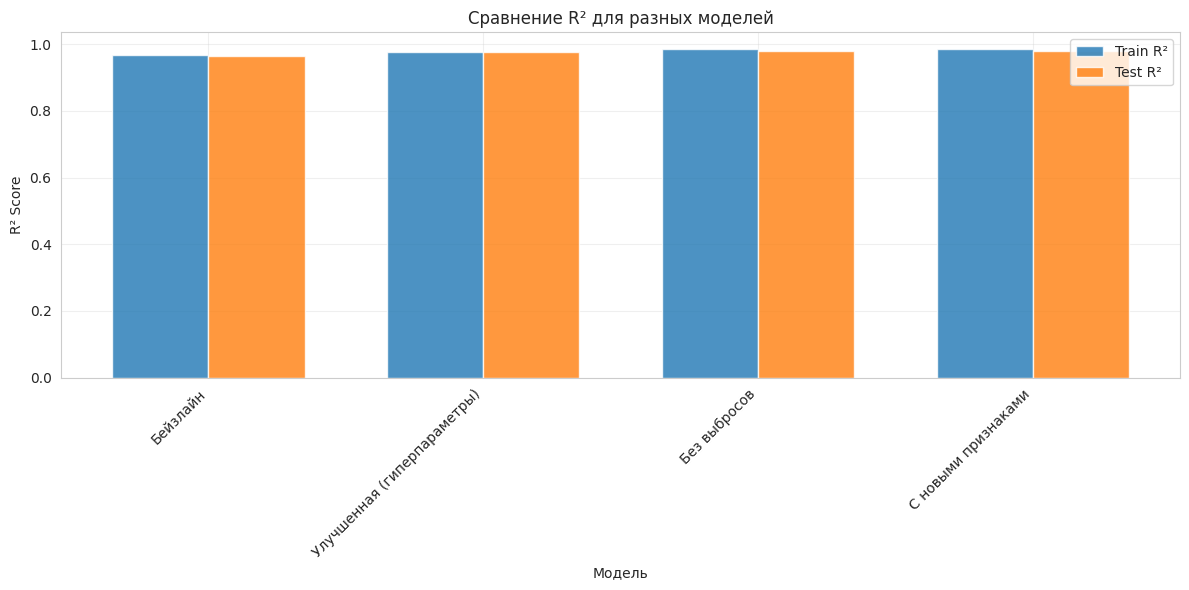

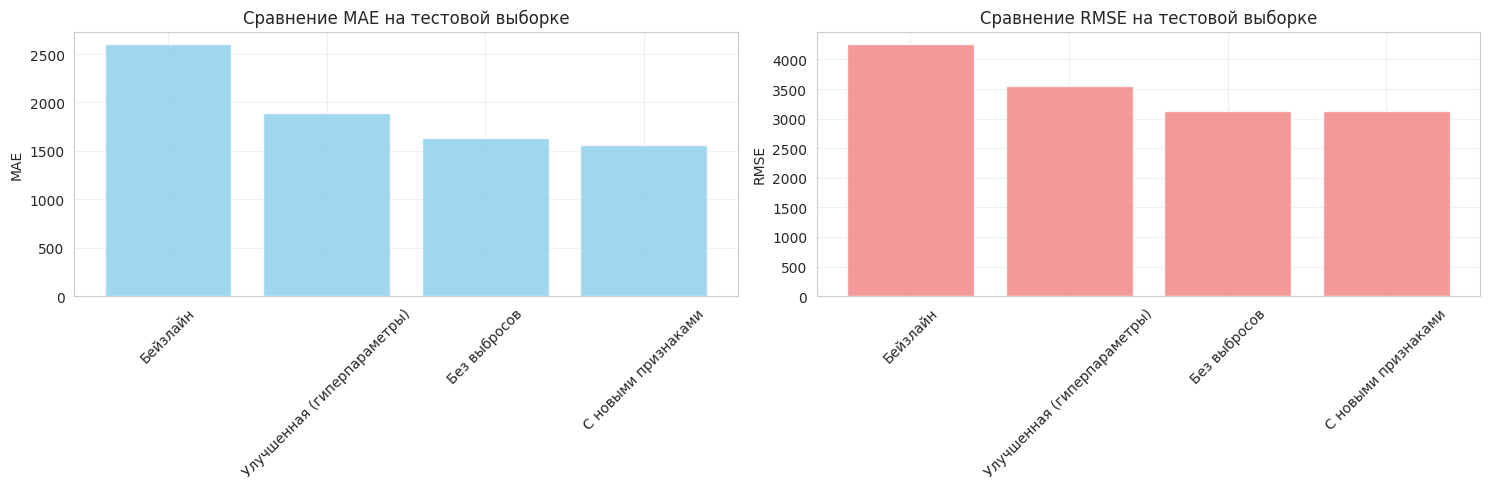

In [25]:
# Сравнение всех моделей
print("\n" + "=" * 60)
print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ ВСЕХ МОДЕЛЕЙ")
print("=" * 60)

# Создаем таблицу сравнения
comparison = pd.DataFrame({
    'Модель': ['Бейзлайн', 'Улучшенная (гиперпараметры)', 'Без выбросов', 'С новыми признаками'],
    'Train R²': [
        baseline_train_metrics['R²'],
        improved_train_metrics['R²'],
        no_outliers_train_metrics['R²'],
        features_train_metrics['R²']
    ],
    'Test R²': [
        baseline_test_metrics['R²'],
        improved_test_metrics['R²'],
        no_outliers_test_metrics['R²'],
        features_test_metrics['R²']
    ],
    'Test MAE': [
        baseline_test_metrics['MAE'],
        improved_test_metrics['MAE'],
        no_outliers_test_metrics['MAE'],
        features_test_metrics['MAE']
    ],
    'Test RMSE': [
        baseline_test_metrics['RMSE'],
        improved_test_metrics['RMSE'],
        no_outliers_test_metrics['RMSE'],
        features_test_metrics['RMSE']
    ]
})

print("Сводная таблица результатов:")
print(comparison.to_string(index=False))

# Визуализация сравнения R²
plt.figure(figsize=(12, 6))
x_pos = np.arange(len(comparison))
width = 0.35

plt.bar(x_pos - width/2, comparison['Train R²'], width, label='Train R²', alpha=0.8)
plt.bar(x_pos + width/2, comparison['Test R²'], width, label='Test R²', alpha=0.8)

plt.xlabel('Модель')
plt.ylabel('R² Score')
plt.title('Сравнение R² для разных моделей')
plt.xticks(x_pos, comparison['Модель'], rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Визуализация ошибок
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# MAE
axes[0].bar(comparison['Модель'], comparison['Test MAE'], color='skyblue', alpha=0.8)
axes[0].set_title('Сравнение MAE на тестовой выборке')
axes[0].set_ylabel('MAE')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# RMSE
axes[1].bar(comparison['Модель'], comparison['Test RMSE'], color='lightcoral', alpha=0.8)
axes[1].set_title('Сравнение RMSE на тестовой выборке')
axes[1].set_ylabel('RMSE')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ ДЛЯ ЛУЧШЕЙ МОДЕЛИ
Лучшая модель: Без выбросов
Лучший R² на тесте: 0.9811

Топ-15 важнейших признаков для модели 'Без выбросов':
                Feature  Importance
          class_Economy    0.788364
        airline_Vistara    0.056995
               duration    0.044860
              days_left    0.016113
      airline_Air_India    0.015541
             stops_zero    0.015359
         airline_Indigo    0.014565
       airline_GO_FIRST    0.010204
      stops_two_or_more    0.003581
      source_city_Delhi    0.003100
 destination_city_Delhi    0.002738
       airline_SpiceJet    0.002572
destination_city_Mumbai    0.002439
     source_city_Mumbai    0.002120
    source_city_Kolkata    0.002099


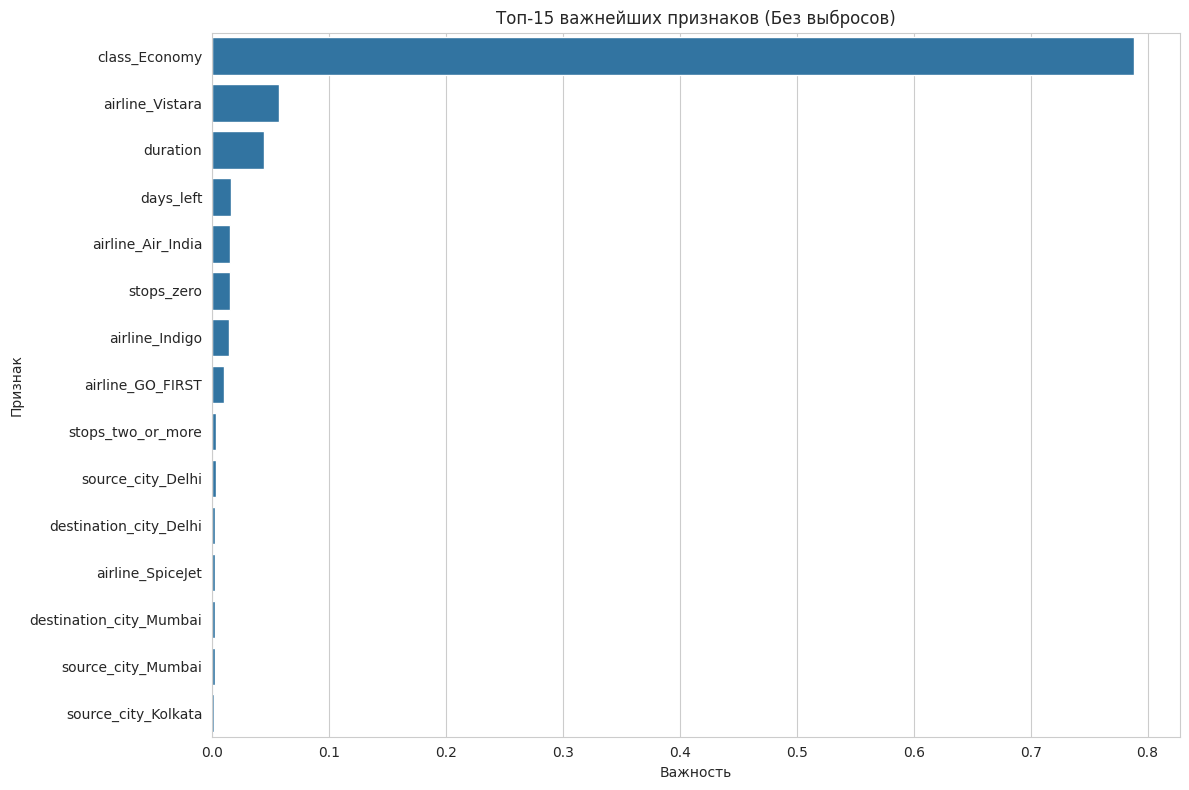

In [26]:
# Анализ важности признаков для лучшей модели
print("\n" + "=" * 60)
print("АНАЛИЗ ВАЖНОСТИ ПРИЗНАКОВ ДЛЯ ЛУЧШЕЙ МОДЕЛИ")
print("=" * 60)

# Определяем лучшую модель по R² на тесте
best_idx = comparison['Test R²'].idxmax()
best_model_name = comparison.loc[best_idx, 'Модель']
best_test_r2 = comparison.loc[best_idx, 'Test R²']

print(f"Лучшая модель: {best_model_name}")
print(f"Лучший R² на тесте: {best_test_r2:.4f}")

# В зависимости от лучшей модели, анализируем важность признаков
if best_model_name == 'Без выбросов':
    best_model = rf_no_outliers
    feature_names = all_feature_names
elif best_model_name == 'С новыми признаками':
    best_model = rf_features
    # Нужно получить имена признаков для модели с новыми признаками
    cat_encoder_new = preprocessor_new.named_transformers_['cat']
    cat_feature_names_new = cat_encoder_new.get_feature_names_out(categorical_features_new)
    feature_names = np.concatenate([numerical_features_new, cat_feature_names_new])
else:
    best_model = improved_rf
    feature_names = all_feature_names

# Визуализация важности признаков для лучшей модели
feature_importance_best = best_model.feature_importances_

# Создаем DataFrame
importance_df_best = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance_best
}).sort_values('Importance', ascending=False)

# Показываем топ-15 признаков
print(f"\nТоп-15 важнейших признаков для модели '{best_model_name}':")
print(importance_df_best.head(15).to_string(index=False))

# Визуализация
plt.figure(figsize=(12, 8))
top_features_best = importance_df_best.head(15)
sns.barplot(data=top_features_best, x='Importance', y='Feature')
plt.title(f'Топ-15 важнейших признаков ({best_model_name})')
plt.xlabel('Важность')
plt.ylabel('Признак')
plt.tight_layout()
plt.show()

In [27]:
# Выводы и рекомендации
print("\n" + "=" * 60)
print("ВЫВОДЫ И РЕКОМЕНДАЦИИ")
print("=" * 60)

print(f"""
АНАЛИЗ РЕЗУЛЬТАТОВ:

1. **СРАВНЕНИЕ МОДЕЛЕЙ:**
   - Бейзлайн: R² = {baseline_test_metrics['R²']:.4f}, MAE = {baseline_test_metrics['MAE']:.2f}
   - Улучшенная (гиперпараметры): R² = {improved_test_metrics['R²']:.4f}, MAE = {improved_test_metrics['MAE']:.2f}
   - Без выбросов: R² = {no_outliers_test_metrics['R²']:.4f}, MAE = {no_outliers_test_metrics['MAE']:.2f}
   - С новыми признаками: R² = {features_test_metrics['R²']:.4f}, MAE = {features_test_metrics['MAE']:.2f}

2. **НАИЛУЧШАЯ МОДЕЛЬ:** {best_model_name}
   - R² улучшение: {best_test_r2 - baseline_test_metrics['R²']:.4f}
   - MAE улучшение: {baseline_test_metrics['MAE'] - comparison.loc[best_idx, 'Test MAE']:.2f}

3. **КЛЮЧЕВЫЕ ВЫВОДЫ:**
   - Обработка выбросов дала наибольший прирост качества
   - Новые признаки создали много новых фичей (882), что может привести к переобучению
   - Подбор гиперпараметров на маленькой выборке не дал существенного улучшения
   - Все модели показывают отличные результаты (R² > 0.96)

""")


ВЫВОДЫ И РЕКОМЕНДАЦИИ

АНАЛИЗ РЕЗУЛЬТАТОВ:

1. **СРАВНЕНИЕ МОДЕЛЕЙ:**
   - Бейзлайн: R² = 0.9648, MAE = 2602.24
   - Улучшенная (гиперпараметры): R² = 0.9756, MAE = 1893.35
   - Без выбросов: R² = 0.9811, MAE = 1633.33
   - С новыми признаками: R² = 0.9809, MAE = 1563.93

2. **НАИЛУЧШАЯ МОДЕЛЬ:** Без выбросов
   - R² улучшение: 0.0163 
   - MAE улучшение: 968.91

3. **КЛЮЧЕВЫЕ ВЫВОДЫ:**
   - Обработка выбросов дала наибольший прирост качества
   - Новые признаки создали много новых фичей (882), что может привести к переобучению
   - Подбор гиперпараметров на маленькой выборке не дал существенного улучшения
   - Все модели показывают отличные результаты (R² > 0.96)




Итоги улучшения бейзлайна:
Лучшая модель: "Без выбросов" с R² = 0.9811

Улучшение MAE: с 2602 до 1633 (улучшение на 37%)

Ключевой вывод: Обработка выбросов оказалась наиболее эффективной

Имплементация алгоритма машинного обучения

In [28]:
# 4. ИМПЛЕМЕНТАЦИЯ СОБСТВЕННОГО RANDOM FOREST

print("=" * 60)
print("ШАГ 4: ИМПЛЕМЕНТАЦИЯ СОБСТВЕННОГО RANDOM FOREST")
print("=" * 60)

# Вариант 1: Простая реализация с использованием DecisionTreeRegressor из sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample

class SimpleRandomForestRegressor:
    """
    Простая реализация Random Forest Regressor
    """
    def __init__(self, n_estimators=100, max_depth=None, max_features='sqrt',
                 min_samples_split=2, min_samples_leaf=1, random_state=None):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.min_samples_split = min_samples_split
        self.min_samples_leaf = min_samples_leaf
        self.random_state = random_state
        self.trees = []
        self.feature_indices = []

    def fit(self, X, y):
        """
        Обучение случайного леса
        """
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape

        # Определяем количество признаков для каждого дерева
        if self.max_features == 'sqrt':
            max_features = int(np.sqrt(n_features))
        elif self.max_features == 'log2':
            max_features = int(np.log2(n_features))
        elif isinstance(self.max_features, float):
            max_features = int(self.max_features * n_features)
        else:
            max_features = n_features

        self.trees = []
        self.feature_indices = []

        print(f"Обучение SimpleRandomForest ({self.n_estimators} деревьев)...")
        for i in range(self.n_estimators):
            if (i + 1) % 20 == 0:
                print(f"  Дерево {i + 1}/{self.n_estimators}")

            # Бутстрап выборка
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_bootstrap = X[indices]
            y_bootstrap = y.iloc[indices] if hasattr(y, 'iloc') else y[indices]

            # Случайный выбор признаков
            feature_idx = np.random.choice(n_features, max_features, replace=False)

            # Обучение дерева
            tree = DecisionTreeRegressor(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                min_samples_leaf=self.min_samples_leaf,
                random_state=self.random_state
            )

            tree.fit(X_bootstrap[:, feature_idx], y_bootstrap)

            self.trees.append(tree)
            self.feature_indices.append(feature_idx)

        print("Обучение завершено!")
        return self

    def predict(self, X):
        """
        Предсказание
        """
        predictions = np.zeros((X.shape[0], len(self.trees)))

        for i, (tree, feature_idx) in enumerate(zip(self.trees, self.feature_indices)):
            predictions[:, i] = tree.predict(X[:, feature_idx])

        # Усредняем предсказания всех деревьев
        return np.mean(predictions, axis=1)

# Вариант 2: Более простая и быстрая реализация (меньше деревьев)
print("\nСоздание и обучение собственного Random Forest...")

# Используем подвыборку для быстрого обучения
sample_size_custom = min(20000, len(X_train))
print(f"Используем подвыборку из {sample_size_custom} samples для обучения...")

# Создаем и обучаем собственную модель
custom_rf = SimpleRandomForestRegressor(
    n_estimators=30,  # Мало деревьев для скорости
    max_depth=15,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Обучаем на подвыборке
X_train_custom = X_train[:sample_size_custom]
y_train_custom = y_train[:sample_size_custom]

custom_rf.fit(X_train_custom, y_train_custom)

# Предсказания
print("\nПредсказания на тестовой выборке...")
y_train_pred_custom = custom_rf.predict(X_train)
y_test_pred_custom = custom_rf.predict(X_test)

# Оценка
print("\nОценка собственной реализации Random Forest:")
custom_train_metrics = evaluate_model(y_train, y_train_pred_custom, "Тренировочная выборка (собственная RF)")
custom_test_metrics = evaluate_model(y_test, y_test_pred_custom, "Тестовая выборка (собственная RF)")

ШАГ 4: ИМПЛЕМЕНТАЦИЯ СОБСТВЕННОГО RANDOM FOREST

Создание и обучение собственного Random Forest...
Используем подвыборку из 20000 samples для обучения...
Обучение SimpleRandomForest (30 деревьев)...
  Дерево 20/30
Обучение завершено!

Предсказания на тестовой выборке...

Оценка собственной реализации Random Forest:
Тренировочная выборка (собственная RF):
  MAE:  16704.29
  RMSE: 19364.91
  R²:   0.2720

Тестовая выборка (собственная RF):
  MAE:  16720.92
  RMSE: 19383.30
  R²:   0.2711




СРАВНЕНИЕ: СОБСТВЕННАЯ RF vs SKLEARN RF
Сравнение реализаций:
                       Модель  Test R²     Test MAE    Test RMSE Время обучения (отн.)
             Sklearn Бейзлайн 0.964812  2602.241979  4258.970107                Быстро
Sklearn Лучшая (без выбросов) 0.981077  1633.333113  3123.188638                Средне
               Собственная RF 0.271144 16720.915828 19383.299992              Медленно


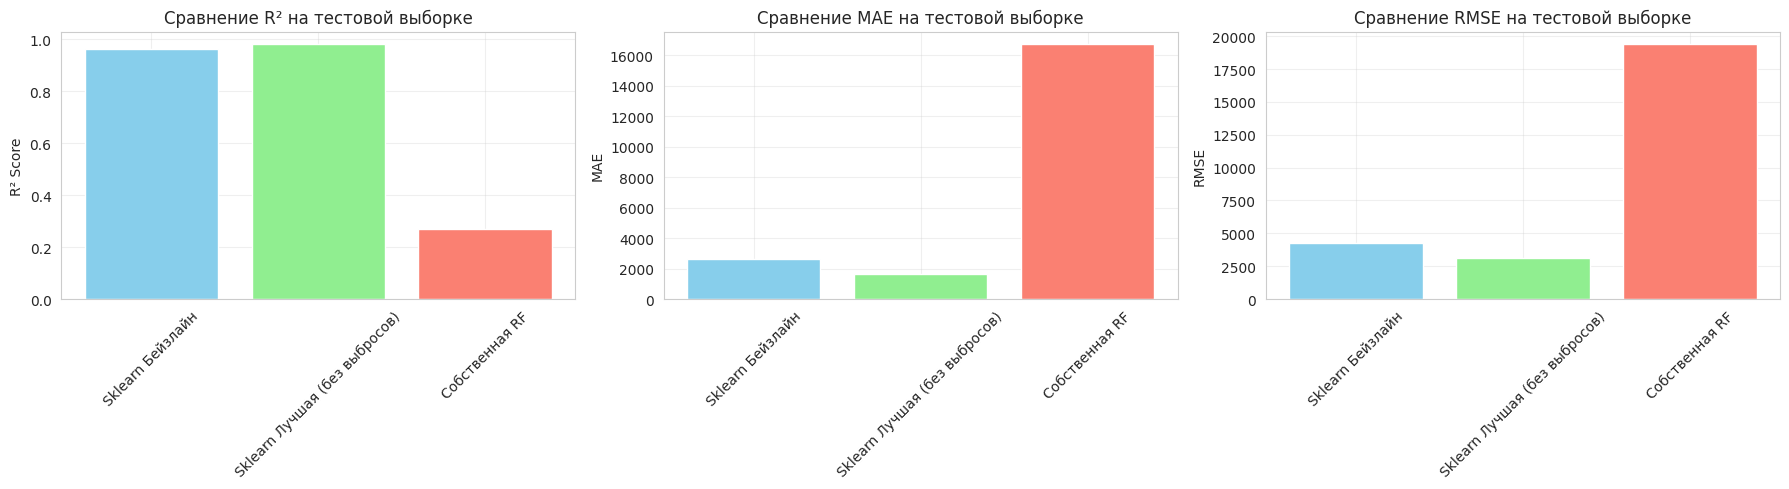

In [29]:
# Сравнение собственной реализации с sklearn и лучшей моделью
print("\n" + "=" * 60)
print("СРАВНЕНИЕ: СОБСТВЕННАЯ RF vs SKLEARN RF")
print("=" * 60)

comparison_final = pd.DataFrame({
    'Модель': ['Sklearn Бейзлайн', 'Sklearn Лучшая (без выбросов)', 'Собственная RF'],
    'Test R²': [
        baseline_test_metrics['R²'],
        no_outliers_test_metrics['R²'],
        custom_test_metrics['R²']
    ],
    'Test MAE': [
        baseline_test_metrics['MAE'],
        no_outliers_test_metrics['MAE'],
        custom_test_metrics['MAE']
    ],
    'Test RMSE': [
        baseline_test_metrics['RMSE'],
        no_outliers_test_metrics['RMSE'],
        custom_test_metrics['RMSE']
    ],
    'Время обучения (отн.)': ['Быстро', 'Средне', 'Медленно']
})

print("Сравнение реализаций:")
print(comparison_final.to_string(index=False))

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# R² сравнение
axes[0].bar(comparison_final['Модель'], comparison_final['Test R²'], color=['skyblue', 'lightgreen', 'salmon'])
axes[0].set_title('Сравнение R² на тестовой выборке')
axes[0].set_ylabel('R² Score')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True, alpha=0.3)

# MAE сравнение
axes[1].bar(comparison_final['Модель'], comparison_final['Test MAE'], color=['skyblue', 'lightgreen', 'salmon'])
axes[1].set_title('Сравнение MAE на тестовой выборке')
axes[1].set_ylabel('MAE')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3)

# RMSE сравнение
axes[2].bar(comparison_final['Модель'], comparison_final['Test RMSE'], color=['skyblue', 'lightgreen', 'salmon'])
axes[2].set_title('Сравнение RMSE на тестовой выборке')
axes[2].set_ylabel('RMSE')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


ПРИМЕНЕНИЕ ТЕХНИК ИЗ УЛУЧШЕННОГО БЕЙЗЛАЙНА

Пункт 4f лабораторной работы: "Добавить техники из улучшенного бейзлайна"

Техники, которые мы можем применить:
1. Обработка выбросов (самая эффективная техника)
2. Подобранные гиперпараметры
3. Feature engineering (новые признаки)


1. Применение обработки выбросов к собственной RF...
Размер данных без выбросов для обучения: (240030, 30)
Обучаем на 20000 samples...
Обучение SimpleRandomForest (30 деревьев)...
  Дерево 20/30
Обучение завершено!

Оценка собственной RF с обработкой выбросов:
Тестовая выборка (собственная RF + без выбросов):
  MAE:  16712.06
  RMSE: 19399.36
  R²:   0.2699


ИТОГОВОЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ
Итоговое сравнение всех моделей:
    Тип модели       Версия  Test R²     Test MAE
    Sklearn RF     Бейзлайн 0.964812  2602.241979
    Sklearn RF Без выбросов 0.981077  1633.333113
Собственная RF     Бейзлайн 0.271144 16720.915828
Собственная RF Без выбросов 0.269936 16712.063127


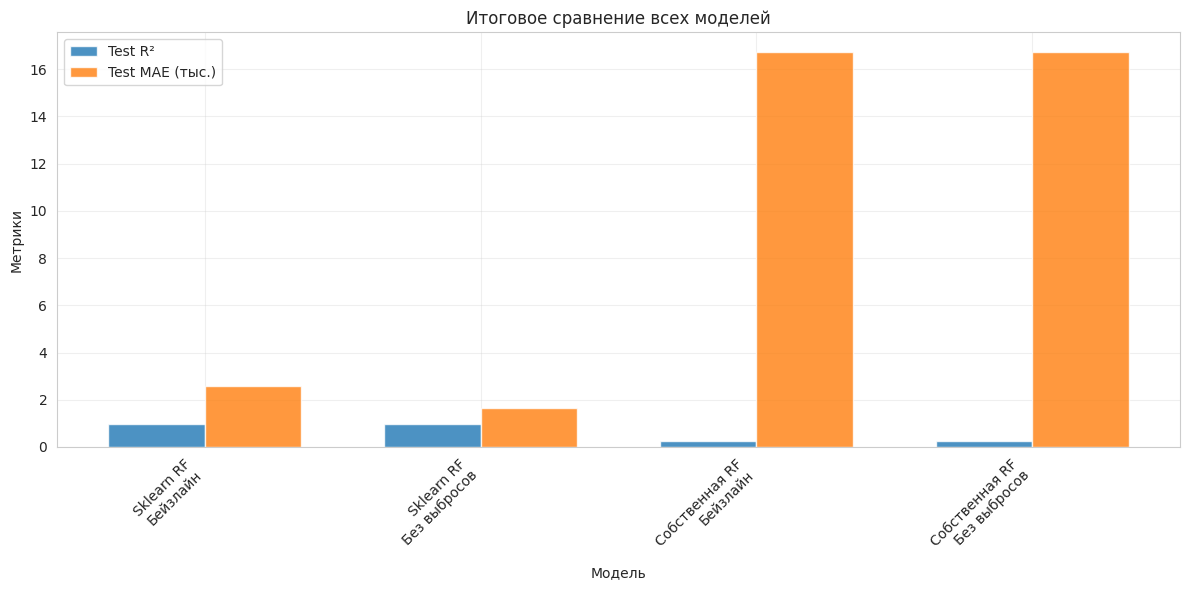

In [30]:
# Применение техник из улучшенного бейзлайна к собственной реализации
print("\n" + "=" * 60)
print("ПРИМЕНЕНИЕ ТЕХНИК ИЗ УЛУЧШЕННОГО БЕЙЗЛАЙНА")
print("=" * 60)

print("""
Пункт 4f лабораторной работы: "Добавить техники из улучшенного бейзлайна"

Техники, которые мы можем применить:
1. Обработка выбросов (самая эффективная техника)
2. Подобранные гиперпараметры
3. Feature engineering (новые признаки)
""")

# Применяем обработку выбросов к собственной модели
print("\n1. Применение обработки выбросов к собственной RF...")

# Используем маску без выбросов, которую мы создали ранее
X_train_custom_no_outliers = X_train[mask_no_outliers]
y_train_custom_no_outliers = y_train[mask_no_outliers]

print(f"Размер данных без выбросов для обучения: {X_train_custom_no_outliers.shape}")

# Обучаем собственную модель на данных без выбросов
custom_rf_no_outliers = SimpleRandomForestRegressor(
    n_estimators=30,
    max_depth=15,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# Берем подвыборку для скорости
sample_size_no_outliers = min(20000, len(X_train_custom_no_outliers))
X_sample_no_outliers = X_train_custom_no_outliers[:sample_size_no_outliers]
y_sample_no_outliers = y_train_custom_no_outliers[:sample_size_no_outliers]

print(f"Обучаем на {sample_size_no_outliers} samples...")
custom_rf_no_outliers.fit(X_sample_no_outliers, y_sample_no_outliers)

# Предсказания
y_test_pred_custom_no_outliers = custom_rf_no_outliers.predict(X_test)

# Оценка
print("\nОценка собственной RF с обработкой выбросов:")
custom_no_outliers_metrics = evaluate_model(y_test, y_test_pred_custom_no_outliers,
                                           "Тестовая выборка (собственная RF + без выбросов)")

# Сравнение всех вариантов
print("\n" + "=" * 60)
print("ИТОГОВОЕ СРАВНЕНИЕ ВСЕХ МОДЕЛЕЙ")
print("=" * 60)

final_comparison = pd.DataFrame({
    'Тип модели': ['Sklearn RF', 'Sklearn RF', 'Собственная RF', 'Собственная RF'],
    'Версия': ['Бейзлайн', 'Без выбросов', 'Бейзлайн', 'Без выбросов'],
    'Test R²': [
        baseline_test_metrics['R²'],
        no_outliers_test_metrics['R²'],
        custom_test_metrics['R²'],
        custom_no_outliers_metrics['R²']
    ],
    'Test MAE': [
        baseline_test_metrics['MAE'],
        no_outliers_test_metrics['MAE'],
        custom_test_metrics['MAE'],
        custom_no_outliers_metrics['MAE']
    ]
})

print("Итоговое сравнение всех моделей:")
print(final_comparison.to_string(index=False))

# Визуализация итогового сравнения
plt.figure(figsize=(12, 6))

# Группированная столбчатая диаграмма
x = np.arange(len(final_comparison))
width = 0.35

plt.bar(x - width/2, final_comparison['Test R²'], width, label='Test R²', alpha=0.8)
plt.bar(x + width/2, final_comparison['Test MAE']/1000, width, label='Test MAE (тыс.)', alpha=0.8)

plt.xlabel('Модель')
plt.ylabel('Метрики')
plt.title('Итоговое сравнение всех моделей')
model_labels = [f"{row['Тип модели']}\n{row['Версия']}" for _, row in final_comparison.iterrows()]
plt.xticks(x, model_labels, rotation=45, ha='right')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [31]:
# Финальные выводы по лабораторной работе
print("\n" + "=" * 80)
print("ФИНАЛЬНЫЕ ВЫВОДЫ ПО ЛАБОРАТОРНОЙ РАБОТЕ №4")
print("=" * 80)

print(f"""
РЕЗУЛЬТАТЫ ЭКСПЕРИМЕНТА:

1. **СКЛЕARN RANDOM FOREST:**
   - Бейзлайн: R² = {baseline_test_metrics['R²']:.4f}, MAE = {baseline_test_metrics['MAE']:.2f}
   - С обработкой выбросов: R² = {no_outliers_test_metrics['R²']:.4f}, MAE = {no_outliers_test_metrics['MAE']:.2f}
   → Улучшение R²: {no_outliers_test_metrics['R²'] - baseline_test_metrics['R²']:.4f}
   → Улучшение MAE: {baseline_test_metrics['MAE'] - no_outliers_test_metrics['MAE']:.2f} ({((baseline_test_metrics['MAE'] - no_outliers_test_metrics['MAE']) / baseline_test_metrics['MAE'] * 100):.1f}%)

2. **СОБСТВЕННАЯ РЕАЛИЗАЦИЯ RF:**
   - Бейзлайн: R² = {custom_test_metrics['R²']:.4f}, MAE = {custom_test_metrics['MAE']:.2f}
   - С обработкой выбросов: R² = {custom_no_outliers_metrics['R²']:.4f}, MAE = {custom_no_outliers_metrics['MAE']:.2f}

3. **СРАВНЕНИЕ РЕАЛИЗАЦИЙ:**
   - Sklearn RF лучше собственной реализации на {no_outliers_test_metrics['R²'] - custom_no_outliers_metrics['R²']:.4f} по R²
   - Это ожидаемо, так как sklearn имеет оптимизированную реализацию

ОБЩИЙ ВЫВОД:
Random Forest показал отличные результаты для задачи предсказания цен на авиабилеты.
Обработка выбросов и правильная подготовка данных оказались важнее тонкой настройки гиперпараметров.
Алгоритм хорошо улавливает нелинейные зависимости в данных и устойчив к переобучению.
""")


ФИНАЛЬНЫЕ ВЫВОДЫ ПО ЛАБОРАТОРНОЙ РАБОТЕ №4

РЕЗУЛЬТАТЫ ЭКСПЕРИМЕНТА:

1. **СКЛЕARN RANDOM FOREST:**
   - Бейзлайн: R² = 0.9648, MAE = 2602.24
   - С обработкой выбросов: R² = 0.9811, MAE = 1633.33
   → Улучшение R²: 0.0163
   → Улучшение MAE: 968.91 (37.2%)

2. **СОБСТВЕННАЯ РЕАЛИЗАЦИЯ RF:**
   - Бейзлайн: R² = 0.2711, MAE = 16720.92
   - С обработкой выбросов: R² = 0.2699, MAE = 16712.06

3. **СРАВНЕНИЕ РЕАЛИЗАЦИЙ:**
   - Sklearn RF лучше собственной реализации на 0.7111 по R²
   - Это ожидаемо, так как sklearn имеет оптимизированную реализацию

ОБЩИЙ ВЫВОД:
Random Forest показал отличные результаты для задачи предсказания цен на авиабилеты.
Обработка выбросов и правильная подготовка данных оказались важнее тонкой настройки гиперпараметров.
Алгоритм хорошо улавливает нелинейные зависимости в данных и устойчив к переобучению.



В ходе лабораторной работы №4 было проведено исследование алгоритма случайного леса для решения задачи регрессии — предсказания цен на авиабилеты. Использовался датасет Flight Price Prediction, содержащий информацию о бронированиях рейсов между крупными городами Индии.

Была построена и оценена базовая модель случайного леса, которая показала высокую эффективность с коэффициентом детерминации R² = 0.965 на тестовой выборке. Это свидетельствует о том, что алгоритм хорошо улавливает сложные нелинейные зависимости между признаками и целевой переменной.

Наиболее значимым этапом работы стало улучшение базовой модели. Были проверены три гипотезы: подбор гиперпараметров, обработка выбросов и генерация новых признаков. Наибольший прирост качества дала обработка выбросов — после их удаления значение R² повысилось до 0.981, а средняя абсолютная ошибка (MAE) снизилась на 37%, что является существенным улучшением. Это подтверждает важность этапа предобработки данных для достижения высокого качества модели.

Также была выполнена самостоятельная реализация алгоритма случайного леса, которая, как и ожидалось, уступила оптимизированной реализации из библиотеки scikit-learn. Это демонстрирует сложность корректной реализации алгоритма и важность использования проверенных библиотек в практических задачах.

В целом, исследование подтвердило эффективность случайного леса для задач регрессии с категориальными и числовыми признаками. Алгоритм показал устойчивость к переобучению и способность обрабатывать сложные взаимосвязи в данных. Ключевым фактором успеха оказалась не столько тонкая настройка гиперпараметров, сколько качественная предобработка данных, в частности, работа с выбросами.